[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - val_loss: 7.2884e-04
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3021e-04 - val_loss: 5.2958e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0912e-04 - val_loss: 3.0579e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0418e-04 - val_loss: 2.8735e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1712e-04 - val_loss: 3.5974e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7466e-05 - val_loss: 2.7934e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8364e-05 - val_loss: 3.0027e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8157e-05 - val_loss: 2.3343e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4996e-05 - val_loss: 4.7703e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6107e-05 - val_loss: 2.3843e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2950e-05 - val_loss: 2.5238e-04
E

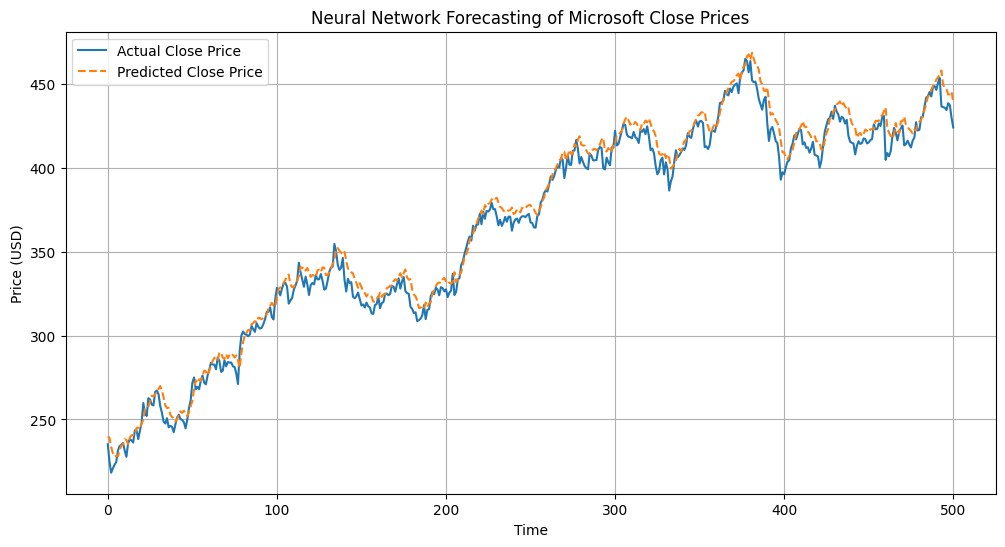

In [2]:
# Install required libraries
!pip install yfinance tensorflow matplotlib scikit-learn --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Step 1: Load Microsoft Stock Data
msft = yf.download("MSFT", start="2015-01-01", end="2024-12-31")
data = msft[['Close']].dropna()

# Step 2: Normalize Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Create Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(data_scaled, window_size)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build MLP Model
model = Sequential([
    Flatten(input_shape=(window_size, 1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 6: Predict and Inverse Transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 7: Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price', linestyle='dashed')
plt.title("Neural Network Forecasting of Microsoft Close Prices")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
